In [1]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
import pandas as pd
import itertools
from scipy import stats

In [2]:
SMALL_SIZE = 10
MEDIUM_SIZE = 14
BIGGER_SIZE = 18

plt.rc('font', size=BIGGER_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=BIGGER_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=BIGGER_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=BIGGER_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=BIGGER_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=BIGGER_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title


In [3]:
def graph_network(net, title, xaxis, yaxis):
    f, ax = plt.subplots(figsize=(20,10))
    nx.draw_networkx(net, with_labels=True, ax=ax, node_size=25, font_size=16, node_color='blue', edge_color='grey', width=0.2)
    ax.set_title(title, fontsize=22)
    ax.set_ylabel(yaxis, fontsize=22)
    ax.set_xlabel(xaxis, fontsize=22)
    ax.grid()
    plt.tight_layout()
    plt.show()

In [4]:
#!sed -i "s/\,/\./g" /home/annaaverina/Desktop/data/Stocks.csv
!sed -i "s/\\t//g" ~/Desktop/data/Thesis_AA.csv

sed: 1: "/Users/annaaverina/Desk ...": command a expects \ followed by text


In [5]:
!ls /home/annaaverina/Desktop/data/

ls: /home/annaaverina/Desktop/data/: No such file or directory


In [6]:
working_path = "~/Desktop/data/"

In [7]:
#data = pd.read_csv("/home/annaaverina/Desktop/data/Stocks.csv", sep=";", index_col=0)
#data = pd.read_excel("./Thesis_AA (1).xlsx", sheet_name="offline")
data = pd.read_csv(working_path+"Thesis_AA.csv", index_col=0)
data.index = pd.to_datetime(data.index)
data[data==" "] = np.nan
data = data.dropna(axis=1, how='all')
data = data.astype(np.float)
##### drop 27 worst cols
final_col = list(data.columns)
[final_col.remove(i) for i in data.isnull().sum(axis=0).sort_values(ascending=False).index[:27]];
data = data[final_col].dropna(axis=0, how="any").copy()

In [8]:
data.to_csv(working_path+"/data.csv")

In [9]:
customer = pd.read_csv(working_path+"customers.csv", index_col=0)
supplier = pd.read_csv(working_path+"suppliers.csv", index_col=0)

sc_companies = []
for table in [customer.reset_index(), supplier.reset_index()]:
    for i in [0,1]:
        sc_companies.extend(table.iloc[:,i])
sc_companies = list(set(sc_companies))

In [10]:
#supplychain = nx.DiGraph()
#supplychain.add_nodes_from([i[:-7] for i in sc_companies])
#for index, row in supplier.reset_index().iterrows():
        #if np.abs (row["%Revenue"])>10:
            #supplychain.add_weighted_edges_from([(row["Company"][:-7],row["Supplier"][:-7], row["%Revenue"])])
    
#for index, row in customer.reset_index().iterrows():
      #  if np.abs (row["%Revenue"])>10:
        #    supplychain.add_weighted_edges_from([(row["Customer"][:-7],row["Company"][:-7], row["%Revenue"])])


In [11]:
returns = np.log(data).diff().dropna(axis=0)
returns = returns.reindex(sorted(returns.columns), axis=1)

In [12]:
returns.cov().head(2)

,000270 KS Equity,002350 KS Equity,004800 KS Equity,005380 KS Equity,012330 KS Equity,175 HK Equity,2105 TT Equity,3401 JP Equity,5101 JP Equity,5105 JP Equity,...,PCAR US Equity,RNO FP Equity,SOP FP Equity,TEN US Equity,TTMT IN Equity,TXT US Equity,UG FP Equity,VMC US Equity,VOW GR Equity,WMT US Equity
000270 KS Equity,0.000887,0.000301,0.000267,0.000601,0.000486,0.000164,0.000123,0.000140,0.000167,0.000172,...,0.000082,0.000137,0.000155,0.000195,0.000172,0.000086,0.000118,0.000053,0.000166,0.000023
002350 KS Equity,0.000301,0.001024,0.000298,0.000327,0.000311,0.000131,0.000100,0.000141,0.000154,0.000209,...,0.000087,0.000157,0.000127,0.000243,0.000152,0.000108,0.000154,0.000092,0.000082,0.000023


In [13]:
returns.to_csv(working_path+"/data_returns.csv")

# Supply chain network

In [14]:
supplychain = nx.DiGraph()
#supplychain.add_nodes_from([i[:-7] for i in sc_companies])
companies_65 = list(returns.cov().columns.str[:-7])
for index, row in supplier.reset_index().iterrows():
    if (row["Company"][:-7] in companies_65) & ( row["Supplier"][:-7] in companies_65) :
        #if np.abs (row["%Revenue"])>10:
            supplychain.add_weighted_edges_from([(row["Company"][:-7],row["Supplier"][:-7], row["%Revenue"])])
    
for index, row in customer.reset_index().iterrows():
    if (row["Company"][:-7] in companies_65) & ( row["Customer"][:-7] in companies_65) :
        #if np.abs (row["%Revenue"])>10:
            supplychain.add_weighted_edges_from([(row["Customer"][:-7],row["Company"][:-7], row["%Revenue"])])

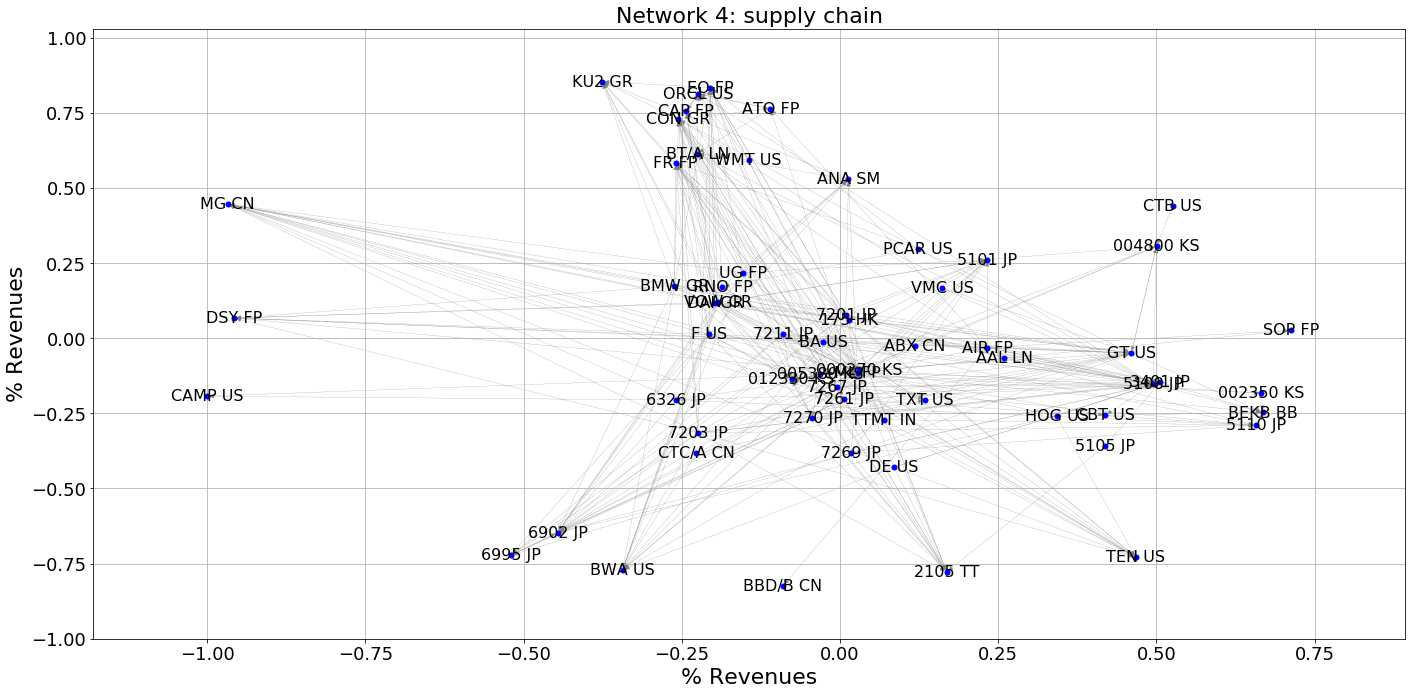

In [15]:
graph_network(supplychain, "Network 4: supply chain", "% Revenues", "% Revenues")

In [16]:
nx.degree_centrality(supplychain)

{'ML FP': 0.6666666666666666,
 'BEKB BB': 0.11666666666666667,
 'CBT US': 0.05,
 'ANA SM': 0.13333333333333333,
 'ATO FP': 0.1,
 'CAP FP': 0.1,
 'ORCL US': 0.15,
 'SOP FP': 0.03333333333333333,
 'CAMP US': 0.03333333333333333,
 'KU2 GR': 0.15,
 'BT/A LN': 0.13333333333333333,
 'DSY FP': 0.13333333333333333,
 '3401 JP': 0.2,
 '004800 KS': 0.13333333333333333,
 'GT US': 0.35,
 'DAI GR': 0.2833333333333333,
 'MG CN': 0.26666666666666666,
 'CON GR': 0.36666666666666664,
 'EO FP': 0.25,
 '5108 JP': 0.3833333333333333,
 'FR FP': 0.3,
 'TEN US': 0.2,
 'BMW GR': 0.21666666666666667,
 '6902 JP': 0.3,
 '7203 JP': 0.26666666666666666,
 '6995 JP': 0.15,
 'F US': 0.26666666666666666,
 'BWA US': 0.23333333333333334,
 'RNO FP': 0.15,
 '7267 JP': 0.21666666666666667,
 'UG FP': 0.18333333333333332,
 '005380 KS': 0.25,
 '012330 KS': 0.2,
 '000270 KS': 0.23333333333333334,
 '7201 JP': 0.26666666666666666,
 'DE US': 0.11666666666666667,
 'TTMT IN': 0.15,
 '7269 JP': 0.18333333333333332,
 '2105 TT': 0.25,


In [52]:
print(" average shortest path", nx.average_shortest_path_length(supplychain), "\n",
"density", nx.density(supplychain), "\n",
"average degree connectivity", nx.average_node_connectivity(supplychain))

 average shortest path 0.3540983606557377 
 density 0.0860655737704918 
 average degree connectivity 0.3765027322404372


In [18]:
#np.array(customer["%Revenue"].values.astype(np.float))

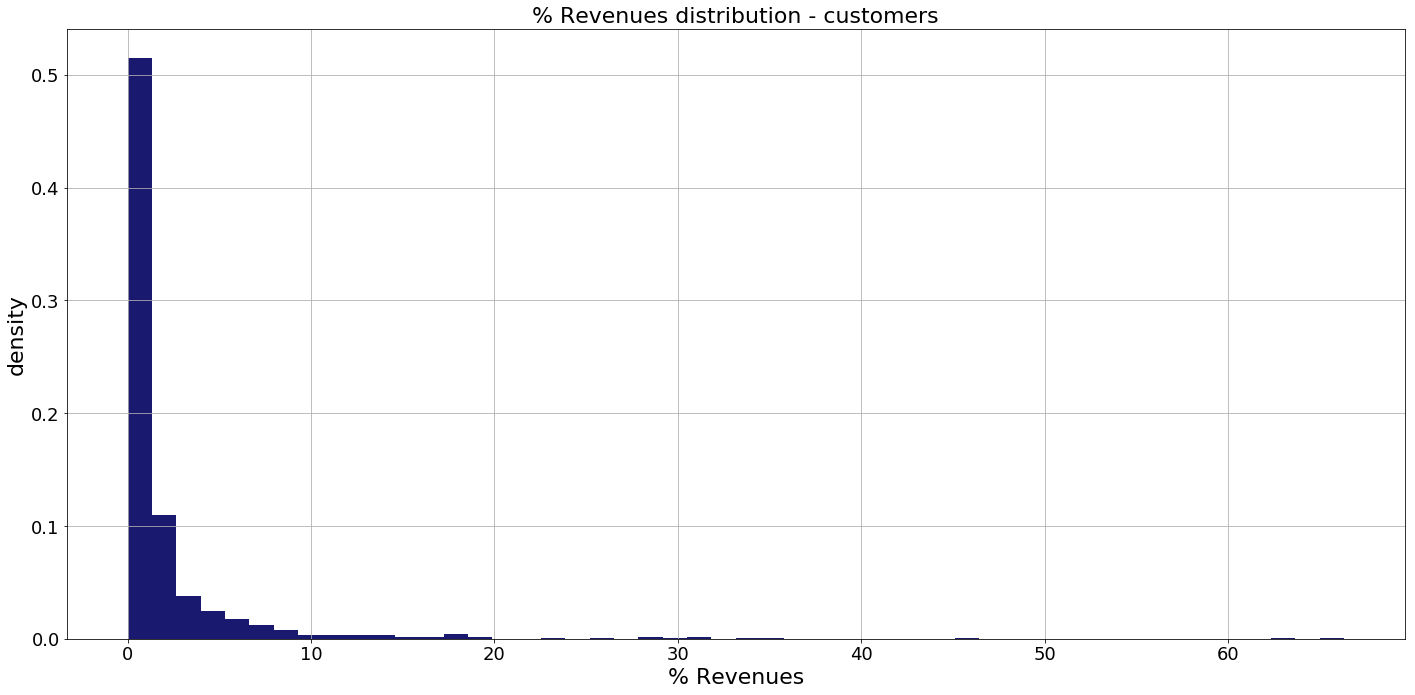

In [19]:
f, ax = plt.subplots(figsize=(20,10))
###################
ax.hist(np.array(customer["%Revenue"].values.astype(np.float)), 50, facecolor='midnightblue', density=True)
###################
ax.set_title('% Revenues distribution - customers', fontsize=22)
ax.set_ylabel('density', fontsize=22)
ax.set_xlabel('% Revenues', fontsize=22)
ax.grid()
plt.tight_layout()
plt.show()

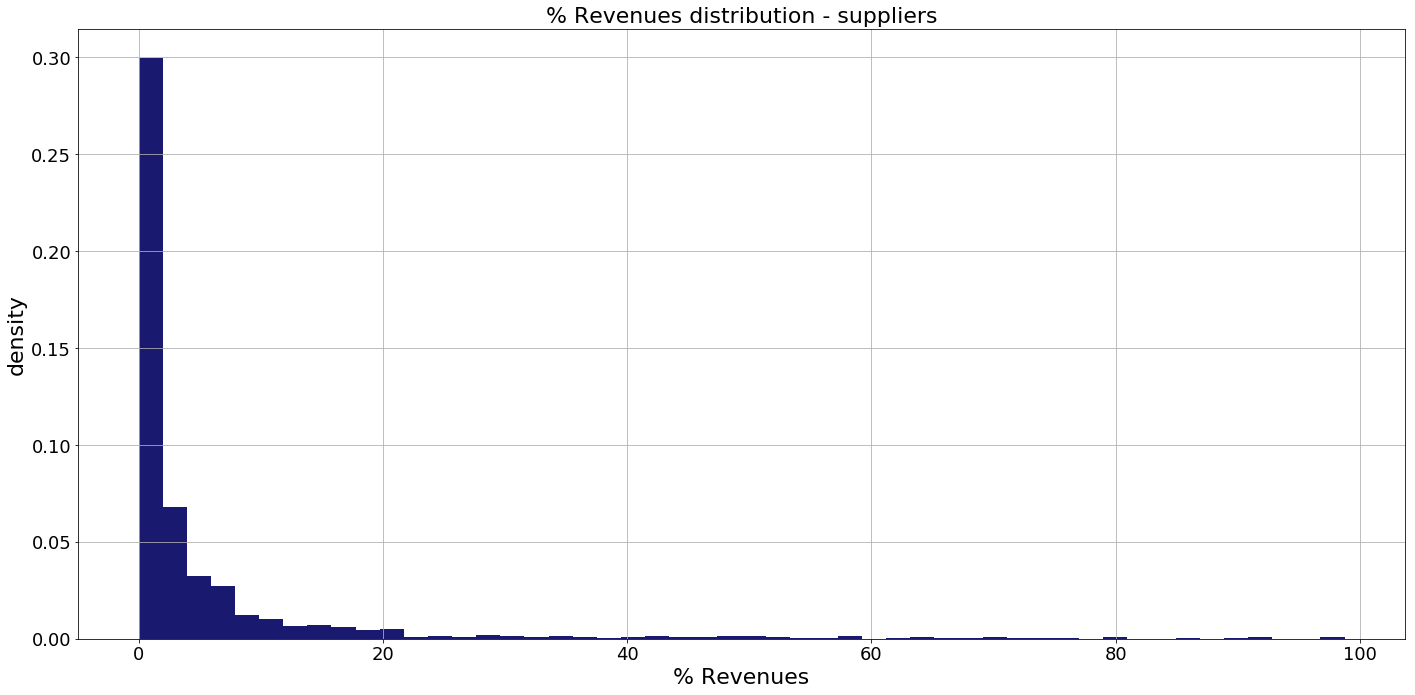

In [20]:
f, ax = plt.subplots(figsize=(20,10))
###################
ax.hist(np.array(supplier["%Revenue"].values.astype(np.float)), 50, facecolor='midnightblue', density=True)
###################
ax.set_title('% Revenues distribution - suppliers', fontsize=22)
ax.set_ylabel('density', fontsize=22)
ax.set_xlabel('% Revenues', fontsize=22)
ax.grid()
plt.tight_layout()
plt.show()

<br>

In [21]:
#plt.hist(returns.cov().squeeze())

In [22]:
#Ntotal = 1000
#data = np.array(returns.cov()).flatten()
#cm = plt.cm.get_cmap('RdYlBu_r')

#n, bins, patches = plt.hist(data, 25, normed=1, color='green')
# To normalize your values
#col = (n-n.min())/(n.max()-n.min())
#for c, p in zip(col, patches):
 #   plt.setp(p, 'facecolor', cm(c))
#plt.show()

In [23]:
#np.array(returns.cov()).flatten().astype(np.float)

# Covariances network

In [24]:
covgraph = nx.Graph()
covgraph.add_nodes_from(returns.cov().columns.str[:-7])
temp_cov = returns.iloc[0:int(returns.shape[0]/2),:].cov()
for i in range(65):
    for j in range(65):
        if i > j & (np.abs(temp_cov.iloc[i,j])>0.0004):
            covgraph.add_weighted_edges_from([(temp_cov.columns[i][:-7], temp_cov.columns[j][:-7], temp_cov.iloc[i,j])])
            

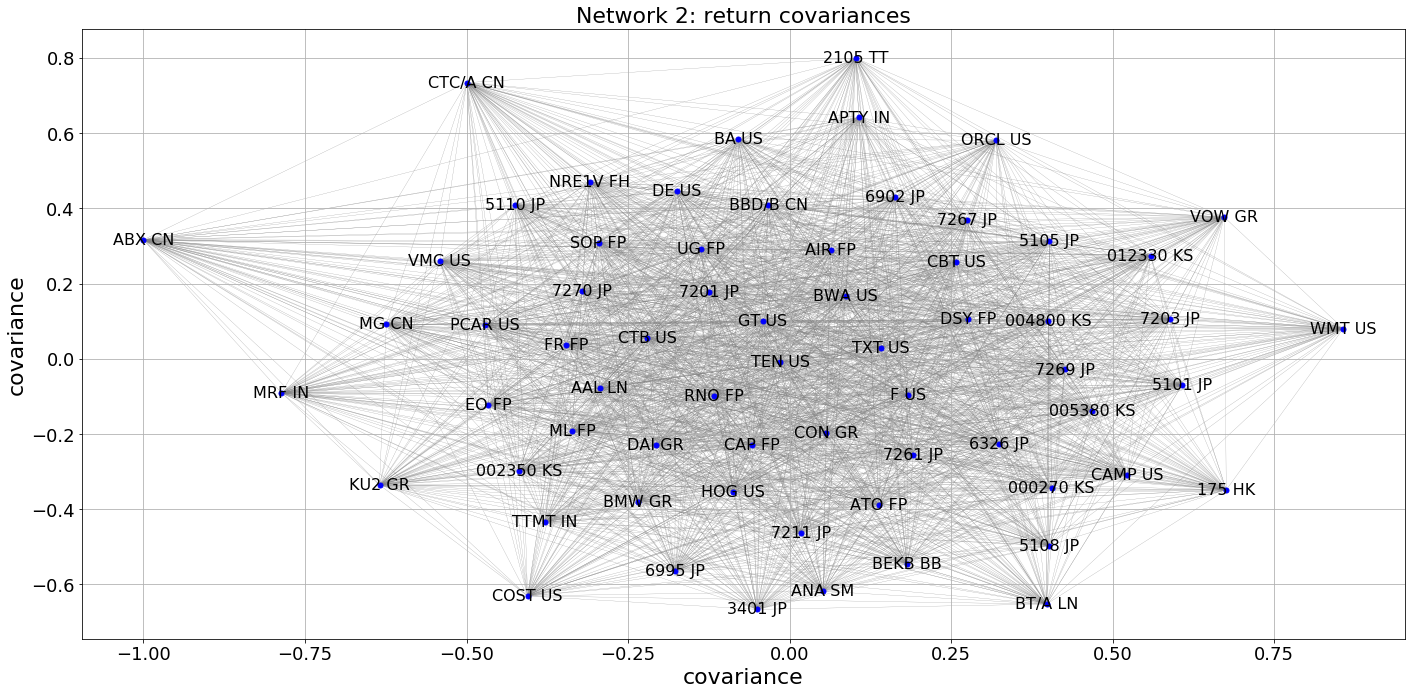

In [25]:
graph_network(covgraph, "Network 2: return covariances", "covariance", "covariance")

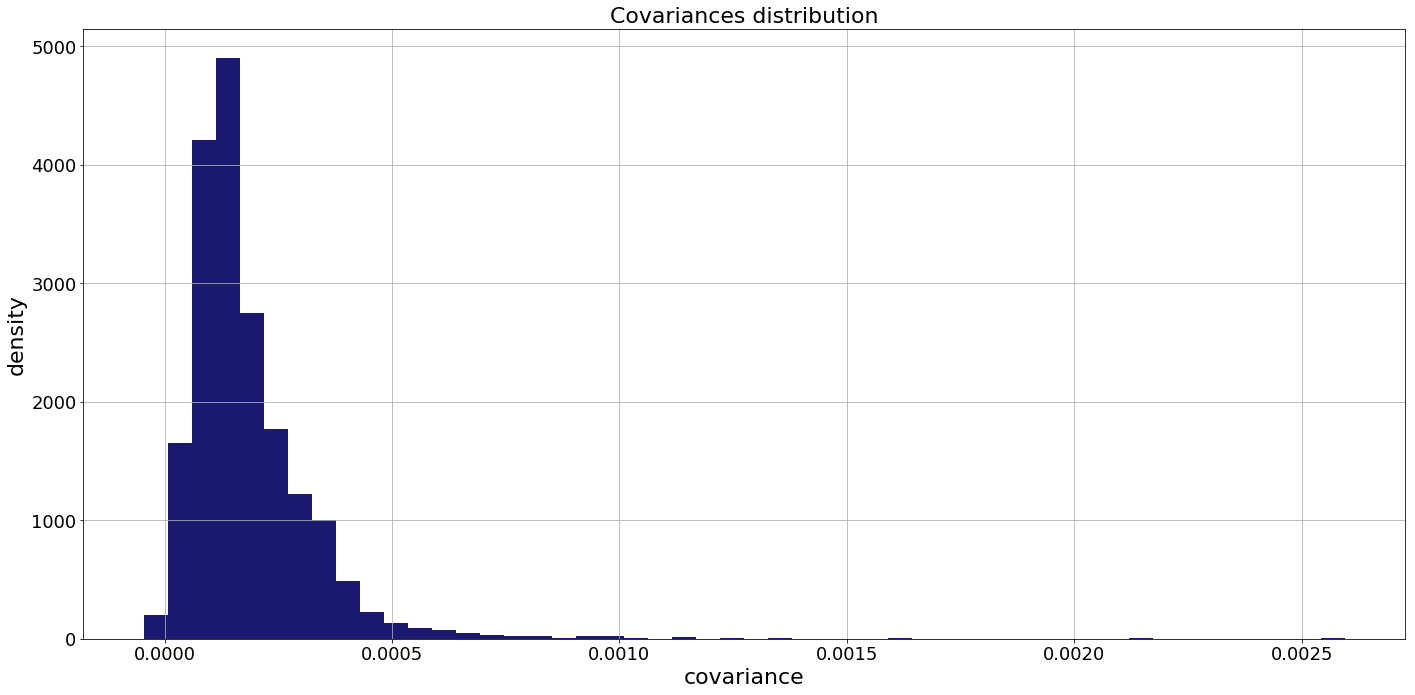

In [26]:
f, ax = plt.subplots(figsize=(20,10))
###################
ax.hist(np.array(returns.cov()).flatten().astype(np.float), 50, facecolor='midnightblue', density=True)
###################
ax.set_title('Covariances distribution', fontsize=22)
ax.set_ylabel('density', fontsize=22)
ax.set_xlabel('covariance', fontsize=22)
ax.grid()
plt.tight_layout()
plt.show()

__________

In [27]:
#labels = []
#for i in range(65):
    #for j in range(65):
        #if i > j & (np.abs(temp_cov.iloc[i,j])>0.0005):
            #labels.append((temp_cov.columns[i][:-7], temp_cov.columns[j][:-7], temp_cov.iloc[i,j]))

In [28]:
#nx.betweenness_centrality(covgraph, weight = (i[2] for i in labels), normalized= False)

In [29]:
nx.degree_centrality(covgraph)

{'000270 KS': 1.0,
 '002350 KS': 1.0,
 '004800 KS': 1.03125,
 '005380 KS': 1.03125,
 '012330 KS': 1.03125,
 '175 HK': 1.03125,
 '2105 TT': 1.03125,
 '3401 JP': 1.03125,
 '5101 JP': 1.03125,
 '5105 JP': 1.03125,
 '5108 JP': 1.03125,
 '5110 JP': 1.03125,
 '6326 JP': 1.03125,
 '6902 JP': 1.03125,
 '6995 JP': 1.03125,
 '7201 JP': 1.03125,
 '7203 JP': 1.03125,
 '7211 JP': 1.03125,
 '7261 JP': 1.03125,
 '7267 JP': 1.03125,
 '7269 JP': 1.03125,
 '7270 JP': 1.03125,
 'AAL LN': 1.03125,
 'ABX CN': 1.03125,
 'AIR FP': 1.03125,
 'ANA SM': 1.03125,
 'APTY IN': 1.03125,
 'ATO FP': 1.03125,
 'BA US': 1.03125,
 'BBD/B CN': 1.03125,
 'BEKB BB': 1.03125,
 'BMW GR': 1.03125,
 'BT/A LN': 1.03125,
 'BWA US': 1.03125,
 'CAMP US': 1.03125,
 'CAP FP': 1.03125,
 'CBT US': 1.03125,
 'CON GR': 1.03125,
 'COST US': 1.03125,
 'CTB US': 1.03125,
 'CTC/A CN': 1.03125,
 'DAI GR': 1.03125,
 'DE US': 1.03125,
 'DSY FP': 1.03125,
 'EO FP': 1.03125,
 'F US': 1.03125,
 'FR FP': 1.03125,
 'GT US': 1.03125,
 'HOG US': 1.03

In [51]:
print(" average shortest path", nx.average_shortest_path_length(covgraph), "\n",
"density", nx.density(covgraph), "\n",
"average degree connectivity", nx.average_node_connectivity(covgraph))

 average shortest path 1.0 
 density 1.0302884615384615 
 average degree connectivity 64.0


_________________

# Correlations network

In [31]:
corrgraph = nx.Graph()
#corrgraph.add_nodes_from(returns.corr().columns.str[:-7])
temp_corr = returns.iloc[0:int(returns.shape[0]/2),:].corr()
for i in range(65):
    for j in range(65):
        if (i > j) & (np.abs(temp_corr.iloc[i,j])>0.03): 
            corrgraph.add_weighted_edges_from([(temp_corr.columns[i][:-7], temp_corr.columns[j][:-7], temp_corr.iloc[i,j])])
            

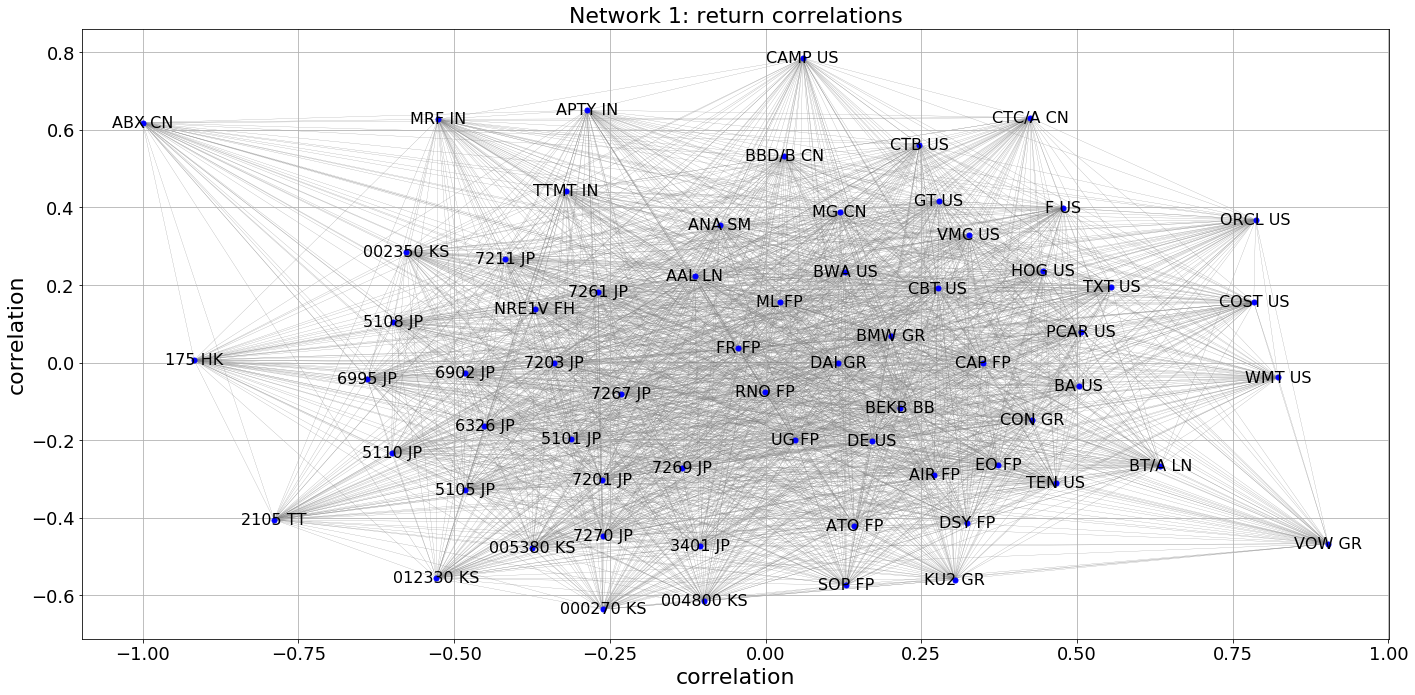

In [32]:
graph_network(corrgraph, "Network 1: return correlations", "correlation", "correlation")

In [33]:
#plt.hist(list(nx.degree_centrality(corrgraph).values()))

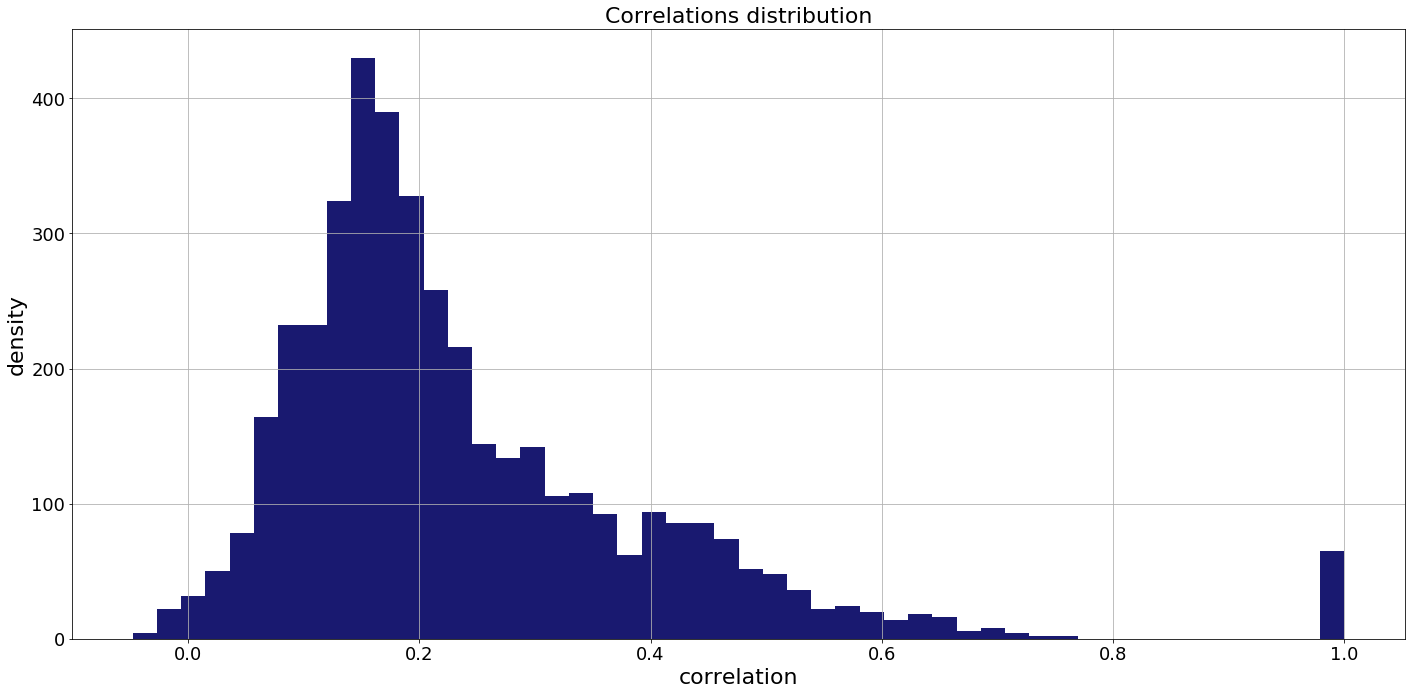

In [34]:
f, ax = plt.subplots(figsize=(20,10))
###################
ax.hist(np.array(returns.corr()).flatten(), 50, facecolor='midnightblue')
###################
ax.set_title('Correlations distribution', fontsize=22)
ax.set_ylabel('density', fontsize=22)
ax.set_xlabel('correlation', fontsize=22)
ax.grid()
plt.tight_layout()
plt.show()

In [35]:
nx.degree_centrality(corrgraph)

{'002350 KS': 0.984375,
 '000270 KS': 1.0,
 '004800 KS': 1.0,
 '005380 KS': 1.0,
 '012330 KS': 1.0,
 '175 HK': 0.9375,
 '2105 TT': 0.953125,
 '3401 JP': 1.0,
 '5101 JP': 0.96875,
 '5105 JP': 0.984375,
 '5108 JP': 0.96875,
 '5110 JP': 0.96875,
 '6326 JP': 0.984375,
 '6902 JP': 0.984375,
 '6995 JP': 0.96875,
 '7201 JP': 1.0,
 '7203 JP': 1.0,
 '7211 JP': 0.984375,
 '7261 JP': 0.984375,
 '7267 JP': 1.0,
 '7269 JP': 1.0,
 '7270 JP': 0.96875,
 'AAL LN': 1.0,
 'ABX CN': 0.6875,
 'AIR FP': 0.984375,
 'ANA SM': 1.0,
 'APTY IN': 0.984375,
 'ATO FP': 0.984375,
 'BA US': 1.0,
 'BBD/B CN': 1.0,
 'BEKB BB': 1.0,
 'BMW GR': 0.984375,
 'BT/A LN': 0.96875,
 'BWA US': 1.0,
 'CAMP US': 0.96875,
 'CAP FP': 1.0,
 'CBT US': 1.0,
 'CON GR': 1.0,
 'COST US': 0.953125,
 'CTB US': 1.0,
 'CTC/A CN': 0.984375,
 'DAI GR': 0.984375,
 'DE US': 1.0,
 'DSY FP': 0.984375,
 'EO FP': 0.984375,
 'F US': 0.984375,
 'FR FP': 0.984375,
 'GT US': 1.0,
 'HOG US': 0.984375,
 'KU2 GR': 1.0,
 'MG CN': 1.0,
 'ML FP': 1.0,
 'MRF IN

In [50]:
print(" average shortest path", nx.average_shortest_path_length(corrgraph), "\n",
"density", nx.density(corrgraph), "\n",
"average degree connectivity", nx.average_node_connectivity(corrgraph))


 average shortest path 1.020673076923077 
 density 0.979326923076923 
 average degree connectivity 61.71057692307692


_________

In [37]:
#plt.hist(list(nx.degree_centrality(covgraph).values()))

<br>

# Betas network

In [39]:
def passive_betas(returns):
    returns_selection = data.iloc[0:int(returns.shape[0]/2),:].copy()
    
    betas = pd.DataFrame(columns=["E1", "E2", "beta", "pvalue", "intercept", "rvalue", "stderr"])
    betas["E1"], betas["E2"] = zip(*itertools.permutations(returns.columns, 2))
    for index, row in betas.iterrows():
        row["beta"], row["intercept"], row["rvalue"], row["pvalue"], row["stderr"] = stats.linregress(returns_selection[row["E2"]],returns_selection[row["E1"]])
    
    betas_selections = betas[betas.pvalue<0.05].copy()
    
    return(betas_selections)

In [40]:
betas = passive_betas(returns)

In [41]:
betas[betas.pvalue<0.05].to_csv("./data_betas.csv", index=False)

In [42]:
betas[((betas.E1 == "ML FP Equity")&(betas.E2 == "DAI GR Equity"))|((betas.E2 == "ML FP Equity")&(betas.E1 == "DAI GR Equity"))]

,E1,E2,beta,pvalue,intercept,rvalue,stderr
2674,DAI GR Equity,ML FP Equity,0.493153,4.34035e-247,19.2394,0.685111,0.0124316
3305,ML FP Equity,DAI GR Equity,0.951788,4.34035e-247,6.03783,0.685111,0.023993


In [43]:
betas[betas.pvalue<0.05]

,E1,E2,beta,pvalue,intercept,rvalue,stderr
0,000270 KS Equity,002350 KS Equity,1.04209,1.25677e-60,9736.68,0.37517,0.0610446
1,000270 KS Equity,004800 KS Equity,0.0319462,1.48599e-07,11223.8,0.124109,0.00605559
2,000270 KS Equity,005380 KS Equity,0.131896,0,4694.17,0.796762,0.00237172
3,000270 KS Equity,012330 KS Equity,0.0738882,7.59769e-202,7369.82,0.635214,0.00212997
4,000270 KS Equity,175 HK Equity,-1059.62,1.01878e-05,12634,-0.10436,239.415
5,000270 KS Equity,2105 TT Equity,81.6936,2.82896e-08,10678.6,0.131075,14.6493
6,000270 KS Equity,3401 JP Equity,2.79252,4.41225e-160,5337.37,0.579191,0.0931852
7,000270 KS Equity,5101 JP Equity,6.26815,9.8284e-142,6156.02,0.550616,0.225301
8,000270 KS Equity,5105 JP Equity,8.50218,4.98713e-246,6199.21,0.684047,0.214954
9,000270 KS Equity,5108 JP Equity,5.72903,1.53734e-237,1223.57,0.675356,0.148326


In [44]:
C = nx.Graph()
C.add_nodes_from(returns.columns.str[:-7])


for index, row in betas.iterrows():
    C.add_weighted_edges_from([(row["E1"][:-7],row["E2"][:-7], row["beta"])])

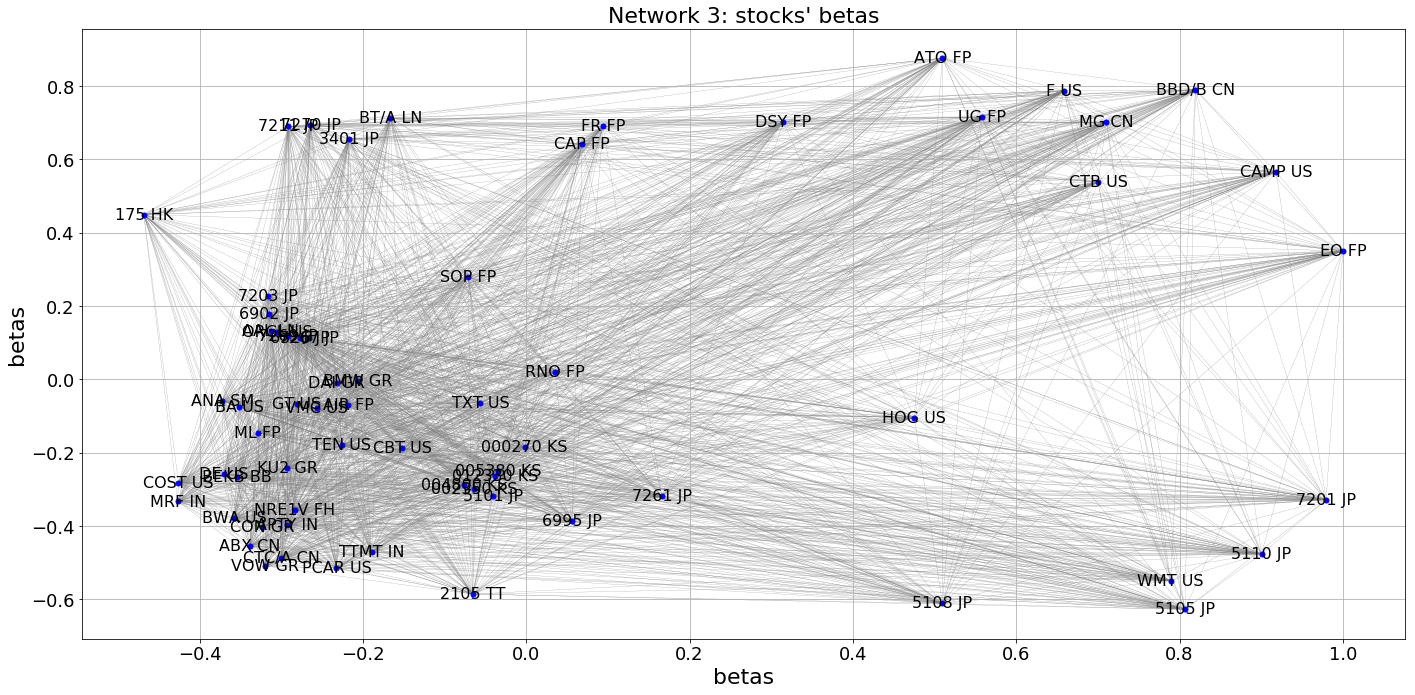

In [45]:
graph_network(C, "Network 3: stocks' betas", "betas", "betas")

In [49]:
print(" average shortest path", nx.average_shortest_path_length(C), "\n",
"density", nx.density(C), "\n",
"average degree connectivity", nx.average_node_connectivity(C))

 average shortest path 1.0528846153846154 
 density 0.9471153846153846 
 average degree connectivity 59.225


In [47]:
nx.degree_centrality(C)

{'000270 KS': 0.96875,
 '002350 KS': 0.90625,
 '004800 KS': 0.96875,
 '005380 KS': 0.9375,
 '012330 KS': 0.953125,
 '175 HK': 0.84375,
 '2105 TT': 0.96875,
 '3401 JP': 0.984375,
 '5101 JP': 0.953125,
 '5105 JP': 0.953125,
 '5108 JP': 0.9375,
 '5110 JP': 0.9375,
 '6326 JP': 0.9375,
 '6902 JP': 0.984375,
 '6995 JP': 0.96875,
 '7201 JP': 0.9375,
 '7203 JP': 0.96875,
 '7211 JP': 0.96875,
 '7261 JP': 0.9375,
 '7267 JP': 0.96875,
 '7269 JP': 0.984375,
 '7270 JP': 0.953125,
 'AAL LN': 0.921875,
 'ABX CN': 0.953125,
 'AIR FP': 0.921875,
 'ANA SM': 0.953125,
 'APTY IN': 0.96875,
 'ATO FP': 0.9375,
 'BA US': 0.984375,
 'BBD/B CN': 0.984375,
 'BEKB BB': 0.9375,
 'BMW GR': 0.953125,
 'BT/A LN': 0.828125,
 'BWA US': 1.0,
 'CAMP US': 0.859375,
 'CAP FP': 0.9375,
 'CBT US': 0.96875,
 'CON GR': 0.96875,
 'COST US': 0.953125,
 'CTB US': 0.859375,
 'CTC/A CN': 0.984375,
 'DAI GR': 0.96875,
 'DE US': 0.96875,
 'DSY FP': 0.828125,
 'EO FP': 0.96875,
 'F US': 1.0,
 'FR FP': 0.90625,
 'GT US': 1.0,
 'HOG US

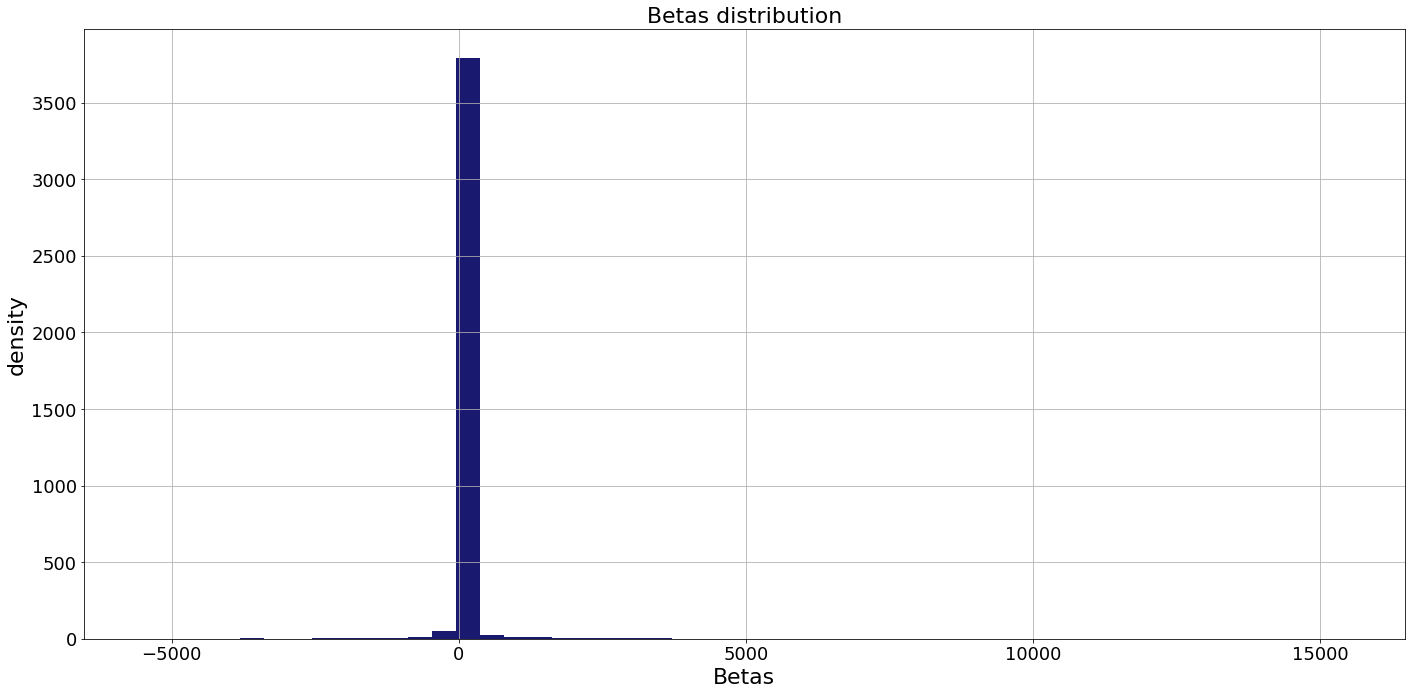

In [48]:
f, ax = plt.subplots(figsize=(20,10))
###################
ax.hist(np.array(betas.beta.values.astype(np.float)), 50, facecolor='midnightblue')
###################
ax.set_title('Betas distribution', fontsize=22)
ax.set_ylabel('density', fontsize=22)
ax.set_xlabel('Betas', fontsize=22)
ax.grid()
plt.tight_layout()
plt.show()

# Hypothesis 2 - LS test - Betas network

In [732]:
betas_table=passive_betas(returns)

In [733]:
_1= betas_table["E1"].values.tolist(); _2 = betas_table["E2"].values.tolist(); _1.extend(_2)

In [734]:
companies = list(set(_1))

In [735]:
betas_table

,E1,E2,beta,pvalue,intercept,rvalue,stderr
0,000270 KS Equity,002350 KS Equity,1.7042,2.66892e-70,9201.99,0.445314,0.0908678
1,000270 KS Equity,004800 KS Equity,0.0814719,1.67454e-10,10990.4,0.168236,0.0126591
2,000270 KS Equity,005380 KS Equity,0.154547,0,4210.65,0.868513,0.00233897
3,000270 KS Equity,012330 KS Equity,0.0993356,4.48601e-247,6745.49,0.739882,0.00239518
4,000270 KS Equity,175 HK Equity,-3658.91,1.04832e-33,14793.8,-0.312857,294.57
5,000270 KS Equity,2105 TT Equity,59.521,0.0125255,11164.9,0.0661555,23.8068
6,000270 KS Equity,3401 JP Equity,3.48188,1.46683e-182,3229.64,0.665093,0.103672
7,000270 KS Equity,5101 JP Equity,6.50201,1.01779e-133,6173.53,0.588978,0.236587
8,000270 KS Equity,5105 JP Equity,9.21654,5.45124e-247,5500.66,0.739798,0.222285
9,000270 KS Equity,5108 JP Equity,5.92949,6.81353e-219,677.842,0.710074,0.155925


In [736]:
positions_dict_betas = dict((company,0) for company in companies)
for index, row in betas_table.iterrows():
    if np.abs(row["beta"]) <= 3:
        positions_dict_betas[row["E1"]] += 1
        positions_dict_betas[row["E2"]] -= row["beta"]

In [737]:
out = pd.DataFrame.from_dict(positions_dict_betas, orient='index', columns=['betas_net'])
out["betas_scaled"] = 2*(out["betas_net"] - np.min(out["betas_net"]))/np.abs(2*np.min(out["betas_net"]))-1
out = out.reindex(sorted(out.index), axis=0)

In [738]:
out.head(10)

,betas_net,betas_scaled
000270 KS Equity,8.944745,41.423982
002350 KS Equity,13.441766,62.250119
004800 KS Equity,-0.215932,-1.000000
005380 KS Equity,-0.000749,-0.003466
012330 KS Equity,0.711801,3.296417
175 HK Equity,56.505963,261.684587
2105 TT Equity,38.870853,180.014683
3401 JP Equity,11.564897,53.558156
5101 JP Equity,0.573835,2.657485
5105 JP Equity,0.746478,3.457011


In [739]:
out.sort_values(by="betas_net", ascending=False)

,betas_net,betas_scaled
WMT US Equity,88.020167,407.629918
F US Equity,75.021786,347.433157
BBD/B CN Equity,72.968664,337.924952
ATO FP Equity,60.093104,278.296986
CAP FP Equity,58.025808,268.723139
175 HK Equity,56.505963,261.684587
CAMP US Equity,54.452285,252.173805
FR FP Equity,53.483826,247.688776
APTY IN Equity,49.879953,230.998893
EO FP Equity,49.405716,228.802658


In [740]:
long_stock_betas_static = out.sort_values(by="betas_net", ascending=False).iloc[0:20,:].index

In [741]:
short_stock_betas_static = out.sort_values(by="betas_net", ascending=False).iloc[-20:,:].index

In [742]:
strategies = pd.DataFrame()
strategies["passive_ShortBias"] = returns.iloc[int(returns.shape[0]/2):,:].mul(out["betas_scaled"], axis=1).sum(axis=1)


In [743]:
results = pd.DataFrame(index=["mean", "std", "sharpe"])

In [744]:
strategies["ls_stock_betas_static_1"] = returns[long_stock_betas_static].iloc[int(returns.shape[0]/2):,:].sum(axis=1)-returns[short_stock_betas_static].iloc[int(returns.shape[0]/2):,:].sum(axis=1)
results["ls_stock_betas_static_1"] = [np.mean(strategies["ls_stock_betas_static_1"]), np.std(strategies["ls_stock_betas_static_1"]), np.mean(strategies["ls_stock_betas_static_1"])/np.std(strategies["ls_stock_betas_static_1"])]

strategies["ls_stock_betas_static_2"] = -returns[long_stock_betas_static].iloc[int(returns.shape[0]/2):,:].sum(axis=1)+returns[short_stock_betas_static].iloc[int(returns.shape[0]/2):,:].sum(axis=1)
results["ls_stock_betas_static_2"] = [np.mean(strategies["ls_stock_betas_static_2"]), np.std(strategies["ls_stock_betas_static_2"]), np.mean(strategies["ls_stock_betas_static_2"])/np.std(strategies["ls_stock_betas_static_2"])]

In [745]:
 returns.iloc[int(returns.shape[0]/2):,:].mul(out["betas_scaled"], axis=1).sum(axis=1)

2009-12-04     62.796168
2009-12-07     38.761530
2009-12-08    -97.440939
2009-12-09    -42.479768
2009-12-10     -0.108140
2009-12-11     53.106178
2009-12-14     75.161530
2009-12-15     15.974608
2009-12-16     55.167611
2009-12-17    -69.917791
2009-12-18      7.696301
2009-12-21     51.290447
2009-12-22    100.012127
2009-12-29    103.102159
2009-12-30     13.415533
2010-01-04    181.229418
2010-01-05    127.705051
2010-01-07    148.023304
2010-01-08     19.550061
2010-01-12    -77.052754
2010-01-13     19.293208
2010-01-14    105.449777
2010-01-15    -88.616074
2010-01-19     47.573284
2010-01-20   -144.781554
2010-01-21   -189.783214
2010-01-22   -174.607563
2010-01-25    -19.805765
2010-01-27   -132.512597
2010-01-28    -87.456242
                 ...    
2018-10-19   -459.910971
2018-10-22     -7.588402
2018-10-23   -169.859143
2018-10-24   -229.732678
2018-10-25    197.045977
2018-10-26   -125.268690
2018-10-29    129.942822
2018-10-30    140.998808
2018-10-31     98.035980


In [746]:
strategies.head(5)

,passive_ShortBias,ls_stock_betas_static_1,ls_stock_betas_static_2
2009-12-04,62.796168,-0.319702,0.319702
2009-12-07,38.761530,-0.225107,0.225107
2009-12-08,-97.440939,-0.039124,0.039124
2009-12-09,-42.479768,-0.008813,0.008813
2009-12-10,-0.108140,0.199387,-0.199387


In [747]:
results["passive_ShortBias"] = [np.mean(strategies["passive_ShortBias"]), np.std(strategies["passive_ShortBias"]), np.mean(strategies["passive_ShortBias"])/np.std(strategies["passive_ShortBias"])]

In [748]:
results

,ls_stock_betas_static_1,ls_stock_betas_static_2,passive_ShortBias
mean,0.002282,-0.002282,4.135474
std,0.268127,0.268127,117.632019
sharpe,0.008512,-0.008512,0.035156


____

# Miscellanous network - corrs neutrality


In [749]:
def passive_corrs(returns):
    returns_selection = returns.iloc[0:int(returns.shape[0]*2/3),:].copy()
    corrs_selection = returns_selection.corr()
    
    corrs = pd.DataFrame(columns=["E1", "E2", "corr"])
    corrs["E1"], corrs["E2"] = zip(*itertools.combinations(returns.columns, 2))
    for index, row in corrs.iterrows():
        row["corr"] = corrs_selection.loc[row["E1"], row["E2"]]
        
    return(corrs)

In [750]:
corrs_table = passive_corrs(returns)

In [751]:
positions_dict_corrs = dict((company,0) for company in returns.columns)
for index, row in corrs_table.iterrows():
    positions_dict_corrs[row["E1"]] += 1
    positions_dict_corrs[row["E2"]] -= row["corr"]

In [752]:
out['corrs_net'] = pd.DataFrame.from_dict(positions_dict_corrs, orient='index', columns=['corrs_net'])['corrs_net']
out["corrs_scaled"] = 2*(out["corrs_net"] + np.max(out["corrs_net"]))/(2*64)-1
out = out.reindex(sorted(out.index), axis=0)

In [753]:
out.head(10)

,betas_net,betas_scaled,corrs_net,corrs_scaled
000270 KS Equity,8.944745,41.423982,64.000000,1.000000
002350 KS Equity,13.441766,62.250119,62.674952,0.979296
004800 KS Equity,-0.215932,-1.000000,61.400408,0.959381
005380 KS Equity,-0.000749,-0.003466,59.613049,0.931454
012330 KS Equity,0.711801,3.296417,58.127555,0.908243
175 HK Equity,56.505963,261.684587,58.259923,0.910311
2105 TT Equity,38.870853,180.014683,57.051402,0.891428
3401 JP Equity,11.564897,53.558156,55.572471,0.868320
5101 JP Equity,0.573835,2.657485,53.936780,0.842762
5105 JP Equity,0.746478,3.457011,52.541021,0.820953


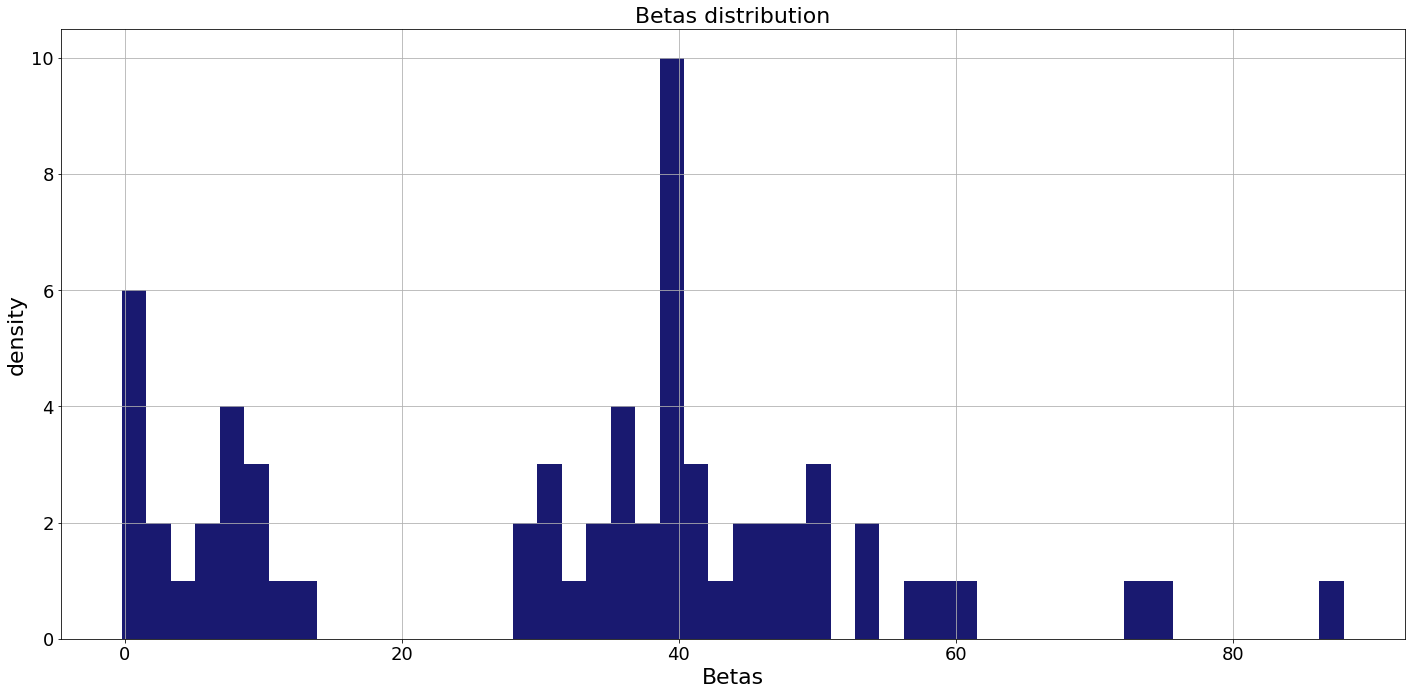

In [754]:
f, ax = plt.subplots(figsize=(20,10))
###################
ax.hist(np.array(out.betas_net.values.astype(np.float)), 50, facecolor='midnightblue')
###################
ax.set_title('Betas distribution', fontsize=22)
ax.set_ylabel('density', fontsize=22)
ax.set_xlabel('Betas', fontsize=22)
ax.grid()
plt.tight_layout()
plt.show()

In [755]:
def passive_covs(returns):
    returns_selection = returns.iloc[0:int(returns.shape[0]*2/3),:].copy()
    covs_selection = returns_selection.cov()
    
    covs = pd.DataFrame(columns=["E1", "E2", "cov"])
    covs["E1"], covs["E2"] = zip(*itertools.combinations(returns.columns, 2))
    for index, row in covs.iterrows():
        row["cov"] = covs_selection.loc[row["E1"], row["E2"]]
        
    return(covs)

In [756]:
covs_table = passive_covs(returns)

In [757]:
positions_dict_covs = dict((company,0) for company in returns.columns)
for index, row in covs_table.iterrows():
    positions_dict_covs[row["E1"]] += 1
    positions_dict_covs[row["E2"]] -= row["cov"]

In [758]:
out['covs_net'] = pd.DataFrame.from_dict(positions_dict_covs, orient='index', columns=['covs_net'])['covs_net']
out["covs_scaled"] = 2*(out["covs_net"] + np.max(out["covs_net"]))/(2*64)-1
out = out.reindex(sorted(out.index), axis=0)

In [759]:
out.head(10)

,betas_net,betas_scaled,corrs_net,corrs_scaled,covs_net,covs_scaled
000270 KS Equity,8.944745,41.423982,64.000000,1.000000,64.000000,1.000000
002350 KS Equity,13.441766,62.250119,62.674952,0.979296,62.999606,0.984369
004800 KS Equity,-0.215932,-1.000000,61.400408,0.959381,61.999227,0.968738
005380 KS Equity,-0.000749,-0.003466,59.613049,0.931454,60.998359,0.953099
012330 KS Equity,0.711801,3.296417,58.127555,0.908243,59.997820,0.937466
175 HK Equity,56.505963,261.684587,58.259923,0.910311,58.998890,0.921858
2105 TT Equity,38.870853,180.014683,57.051402,0.891428,57.999047,0.906235
3401 JP Equity,11.564897,53.558156,55.572471,0.868320,56.998732,0.890605
5101 JP Equity,0.573835,2.657485,53.936780,0.842762,55.998350,0.874974
5105 JP Equity,0.746478,3.457011,52.541021,0.820953,54.997648,0.859338


In [760]:
#out["corrs_net"].hist()

In [761]:
#out["corrs_scaled"].hist()

In [762]:
strategies["passive_LongBias"] = returns.iloc[int(returns.shape[0]*2/3):,:].mul(out["corrs_scaled"], axis=1).sum(axis=1)
results["passive_LongBias"] = [np.mean(strategies["passive_LongBias"]), np.std(strategies["passive_LongBias"]), np.mean(strategies["passive_LongBias"])/np.std(strategies["passive_LongBias"])]

In [763]:
results

,ls_stock_betas_static_1,ls_stock_betas_static_2,passive_ShortBias,passive_LongBias
mean,0.002282,-0.002282,4.135474,0.008334
std,0.268127,0.268127,117.632019,0.263877
sharpe,0.008512,-0.008512,0.035156,0.031581


# Hypothesis 1 test - Centrality - Betas network

In [764]:
last_effort = pd.DataFrame.from_dict(nx.betweenness_centrality(C), orient='index', columns=['centrality'])

In [765]:
long_stock = last_effort.sort_values(by="centrality", ascending=False).iloc[0:16,:].index

In [766]:
np.sum(out.loc[long_stock+" Equity","betas_net"])

533.7739871376621

In [767]:
short_stock = last_effort.sort_values(by="centrality", ascending=False).iloc[-5:,:].index

In [768]:
np.sum(out.loc[short_stock+" Equity","betas_net"])

57.87299262512721

In [769]:
np.sum(out.loc[long_stock+" Equity","betas_net"])/np.sum(out.loc[short_stock+" Equity","betas_net"])

9.223196571070508

In [805]:
strategies["H1_betas"] = returns[[i + " Equity" for i in long_stock]].iloc[int(returns.shape[0]/2):,:].sum(axis=1)-returns[[i + " Equity" for i in short_stock]].iloc[int(returns.shape[0]/2):,:].sum(axis=1)
results["H1_betas"] = [(np.mean(strategies["H1_betas"])*250), (np.std(strategies["H1_betas"])*np.sqrt(250)), (np.mean(strategies["H1_betas"])*250)/(np.std(strategies["H1_betas"])*np.sqrt(250))]


In [807]:
strategies["H1_betas*"] = -returns[[i + " Equity" for i in long_stock]].iloc[int(returns.shape[0]/2):,:].sum(axis=1)+returns[[i + " Equity" for i in short_stock]].iloc[int(returns.shape[0]/2):,:].sum(axis=1)
results["H1_betas*"] = [(np.mean(strategies["H1_betas*"])*250), (np.std(strategies["H1_betas*"])*np.sqrt(250)), (np.mean(strategies["H1_betas*"])*250)/(np.std(strategies["H1_betas*"])*np.sqrt(250))]


In [808]:
results

,ls_stock_betas_static_1,ls_stock_betas_static_2,passive_ShortBias,passive_LongBias,H1_betas,H1_betas*,H1_corrs,H1_corrs*,H1_covs,H1_covs*,H2_sc,H2_sc*,H2_betas,H2_betas*
mean,0.002282,-0.002282,4.135474,0.008334,0.749124,-0.749124,0.012292,-0.012292,0.020097,-0.020097,0.016027,-0.016027,-0.003775,0.003775
std,0.268127,0.268127,117.632019,0.263877,2.157220,2.157220,0.448010,0.448010,0.467005,0.467005,0.525445,0.525445,0.246196,0.246196
sharpe,0.008512,-0.008512,0.035156,0.031581,0.347264,-0.347264,0.027437,-0.027437,0.043034,-0.043034,0.030501,-0.030501,-0.015334,0.015334


# Hypothesis 1 test - Centrality - Correlations network

In [773]:
centrality_corrs = pd.DataFrame.from_dict(nx.degree_centrality(corrgraph), orient='index', columns=['centrality'])


In [774]:
long_stock_corr = centrality_corrs.sort_values(by="centrality", ascending=False).iloc[0:40,:].index

In [775]:
np.sum(out.loc[long_stock_corr+" Equity","corrs_net"])

879.2846051444938

In [776]:
short_stock_corr = centrality_corrs.sort_values(by="centrality", ascending=False).iloc[-10:,:].index

In [777]:
np.sum(out.loc[short_stock_corr+" Equity","corrs_net"])

280.35191174617614

In [778]:
np.sum(out.loc[long_stock_corr+" Equity","corrs_net"])/np.sum(out.loc[short_stock_corr+" Equity","corrs_net"])

3.136360296842123

In [809]:
strategies["H1_corrs"] = returns[[i + " Equity" for i in long_stock_corr]].iloc[int(returns.shape[0]/2):,:].sum(axis=1)-returns[[i + " Equity" for i in short_stock_corr]].iloc[int(returns.shape[0]/2):,:].sum(axis=1)
results["H1_corrs"] = [(np.mean(strategies["H1_corrs"])*250), (np.std(strategies["H1_corrs"])*np.sqrt(250)), (np.mean(strategies["H1_corrs"])*250)/(np.std(strategies["H1_corrs"])*np.sqrt(250))]


In [810]:
strategies["H1_corrs*"] = -returns[[i + " Equity" for i in long_stock_corr]].iloc[int(returns.shape[0]/2):,:].sum(axis=1)+returns[[i + " Equity" for i in short_stock_corr]].iloc[int(returns.shape[0]/2):,:].sum(axis=1)
results["H1_corrs*"] = [(np.mean(strategies["H1_corrs*"])*250), (np.std(strategies["H1_corrs*"])*np.sqrt(250)), (np.mean(strategies["H1_corrs*"])*250)/(np.std(strategies["H1_corrs*"])*np.sqrt(250))]


In [811]:
results

,ls_stock_betas_static_1,ls_stock_betas_static_2,passive_ShortBias,passive_LongBias,H1_betas,H1_betas*,H1_corrs,H1_corrs*,H1_covs,H1_covs*,H2_sc,H2_sc*,H2_betas,H2_betas*
mean,0.002282,-0.002282,4.135474,0.008334,0.749124,-0.749124,3.073066,-3.073066,0.020097,-0.020097,0.016027,-0.016027,-0.003775,0.003775
std,0.268127,0.268127,117.632019,0.263877,2.157220,2.157220,7.083655,7.083655,0.467005,0.467005,0.525445,0.525445,0.246196,0.246196
sharpe,0.008512,-0.008512,0.035156,0.031581,0.347264,-0.347264,0.433825,-0.433825,0.043034,-0.043034,0.030501,-0.030501,-0.015334,0.015334


# Hypothesis 1 test - Centrality - Covariances network

In [782]:
centrality_covs = pd.DataFrame.from_dict(nx.degree_centrality(covgraph), orient='index', columns=['centrality'])

In [783]:
long_stock_cov = centrality_covs.sort_values(by="centrality", ascending=False).iloc[0:41,:].index

In [784]:
np.sum(out.loc[long_stock_cov+" Equity","covs_net"])

982.6543150912136

In [785]:
short_stock_cov = centrality_covs.sort_values(by="centrality", ascending=False).iloc[-5:,:].index

In [786]:
np.sum(out.loc[short_stock_cov+" Equity","covs_net"])

256.98816415661827

In [787]:
np.sum(out.loc[long_stock_cov+" Equity","covs_net"])/np.sum(out.loc[short_stock_cov+" Equity","covs_net"])

3.8237337439880967

In [812]:
strategies["H1_covs"] = returns[[i + " Equity" for i in long_stock_cov]].iloc[int(returns.shape[0]/2):,:].sum(axis=1)-returns[[i + " Equity" for i in short_stock_cov]].iloc[int(returns.shape[0]/2):,:].sum(axis=1)
results["H1_covs"] = [(np.mean(strategies["H1_covs"])*250), (np.std(strategies["H1_covs"])*np.sqrt(250)), (np.mean(strategies["H1_covs"])*250)/(np.std(strategies["H1_covs"])*np.sqrt(250))]


In [813]:
strategies["H1_covs*"] = -returns[[i + " Equity" for i in long_stock_cov]].iloc[int(returns.shape[0]/2):,:].sum(axis=1)+returns[[i + " Equity" for i in short_stock_cov]].iloc[int(returns.shape[0]/2):,:].sum(axis=1)
results["H1_covs*"] = [(np.mean(strategies["H1_covs*"])*250), (np.std(strategies["H1_covs*"])*np.sqrt(250)), (np.mean(strategies["H1_covs*"])*250)/(np.std(strategies["H1_covs*"])*np.sqrt(250))]


In [814]:
results

,ls_stock_betas_static_1,ls_stock_betas_static_2,passive_ShortBias,passive_LongBias,H1_betas,H1_betas*,H1_corrs,H1_corrs*,H1_covs,H1_covs*,H2_sc,H2_sc*,H2_betas,H2_betas*
mean,0.002282,-0.002282,4.135474,0.008334,0.749124,-0.749124,3.073066,-3.073066,5.024295,-5.024295,0.016027,-0.016027,-0.003775,0.003775
std,0.268127,0.268127,117.632019,0.263877,2.157220,2.157220,7.083655,7.083655,7.383992,7.383992,0.525445,0.525445,0.246196,0.246196
sharpe,0.008512,-0.008512,0.035156,0.031581,0.347264,-0.347264,0.433825,-0.433825,0.680431,-0.680431,0.030501,-0.030501,-0.015334,0.015334


# Hypothesis 2 test - Centrality - % Revenues network

In [791]:
centrality_sc = pd.DataFrame.from_dict(nx.degree_centrality(supplychain), orient='index', columns=['centrality'])

In [792]:
long_stock_sc = centrality_sc.sort_values(by="centrality", ascending=False).iloc[0:45,:].index

In [793]:
short_stock_sc = centrality_sc.sort_values(by="centrality", ascending=False).iloc[-5:,:].index

In [815]:
strategies["H2_sc"] = returns[[i + " Equity" for i in long_stock_sc]].iloc[int(returns.shape[0]/2):,:].sum(axis=1)-returns[[i + " Equity" for i in short_stock_sc]].iloc[int(returns.shape[0]/2):,:].sum(axis=1)
results["H2_sc"] = [(np.mean(strategies["H2_sc"])*250), (np.std(strategies["H2_sc"])*np.sqrt(250)), (np.mean(strategies["H2_sc"])*250)/(np.std(strategies["H2_sc"])*np.sqrt(250))]


In [816]:
strategies["H2_sc*"] = -returns[[i + " Equity" for i in long_stock_sc]].iloc[int(returns.shape[0]/2):,:].sum(axis=1)+returns[[i + " Equity" for i in short_stock_sc]].iloc[int(returns.shape[0]/2):,:].sum(axis=1)
results["H2_sc*"] = [(np.mean(strategies["H2_sc*"])*250), (np.std(strategies["H2_sc*"])*np.sqrt(250)), (np.mean(strategies["H2_sc*"])*250)/(np.std(strategies["H2_sc*"])*np.sqrt(250))]


In [817]:
results

,ls_stock_betas_static_1,ls_stock_betas_static_2,passive_ShortBias,passive_LongBias,H1_betas,H1_betas*,H1_corrs,H1_corrs*,H1_covs,H1_covs*,H2_sc,H2_sc*,H2_betas,H2_betas*
mean,0.002282,-0.002282,4.135474,0.008334,0.749124,-0.749124,3.073066,-3.073066,5.024295,-5.024295,4.006634,-4.006634,-0.003775,0.003775
std,0.268127,0.268127,117.632019,0.263877,2.157220,2.157220,7.083655,7.083655,7.383992,7.383992,8.308021,8.308021,0.246196,0.246196
sharpe,0.008512,-0.008512,0.035156,0.031581,0.347264,-0.347264,0.433825,-0.433825,0.680431,-0.680431,0.482261,-0.482261,-0.015334,0.015334


# Hypothesis 2 test - Centrality - Betas network

In [797]:
long_stock_betas_static = out.sort_values(by="betas_net", ascending=False).iloc[0:8,:].index

In [798]:
np.sum(out.loc[long_stock_betas_static,"betas_net"])

518.5716038579346

In [799]:
short_stock_betas_static = out.sort_values(by="betas_net", ascending=False).iloc[-21:,:].index

In [800]:
np.sum(out.loc[short_stock_betas_static,"betas_net"])

136.15473504246688

In [801]:
np.sum(out.loc[long_stock_betas_static,"betas_net"])/np.sum(out.loc[short_stock_betas_static,"betas_net"])

3.8086931291533217

In [818]:
strategies["H2_betas"] = returns[long_stock_betas_static].iloc[int(returns.shape[0]/2):,:].sum(axis=1)-returns[short_stock_betas_static].iloc[int(returns.shape[0]/2):,:].sum(axis=1)
results["H2_betas"] = [(np.mean(strategies["H2_betas"])*250), (np.std(strategies["H2_betas"])*np.sqrt(250)), (np.mean(strategies["H2_betas"])*250)/(np.std(strategies["H2_betas"])*np.sqrt(250))]

strategies["H2_betas*"] = -returns[long_stock_betas_static].iloc[int(returns.shape[0]/2):,:].sum(axis=1)+returns[short_stock_betas_static].iloc[int(returns.shape[0]/2):,:].sum(axis=1)
results["H2_betas*"] = [(np.mean(strategies["H2_betas*"])*250), (np.std(strategies["H2_betas*"])*np.sqrt(250)), (np.mean(strategies["H2_betas*"])*250)/(np.std(strategies["H2_betas*"])*np.sqrt(250))]


In [819]:
results

,ls_stock_betas_static_1,ls_stock_betas_static_2,passive_ShortBias,passive_LongBias,H1_betas,H1_betas*,H1_corrs,H1_corrs*,H1_covs,H1_covs*,H2_sc,H2_sc*,H2_betas,H2_betas*
mean,0.002282,-0.002282,4.135474,0.008334,0.749124,-0.749124,3.073066,-3.073066,5.024295,-5.024295,4.006634,-4.006634,-0.943809,0.943809
std,0.268127,0.268127,117.632019,0.263877,2.157220,2.157220,7.083655,7.083655,7.383992,7.383992,8.308021,8.308021,3.892706,3.892706
sharpe,0.008512,-0.008512,0.035156,0.031581,0.347264,-0.347264,0.433825,-0.433825,0.680431,-0.680431,0.482261,-0.482261,-0.242456,0.242456


# Miscellaneous computations 

In [335]:
returns.loc["2000-07-11":"2007-12-01"].shape[0]/returns.shape[0]

0.40005614823133073

In [336]:
1 - returns.loc["2010-01-01":"2018-12-04"].shape[0]/returns.shape[0]

0.5140370578326783

In [337]:
returns.index[int(returns.shape[0]*2/3)]

Timestamp('2012-09-13 00:00:00')

In [338]:
returns.index[int(returns.shape[0]*2/3)]

Timestamp('2012-09-13 00:00:00')

In [238]:
#selecting the number of dropped columns
drop_col = list(data.columns)
for i, col in enumerate(data.isnull().sum(axis=0).sort_values(ascending=False).index):
    drop_col.remove(col)
    print(i+1, data[drop_col].dropna(axis=0, how="any").shape)
    if i == 40:
        break

1 (3563, 64)
2 (3563, 63)
3 (3563, 62)
4 (3563, 61)
5 (3563, 60)
6 (3563, 59)
7 (3563, 58)
8 (3563, 57)
9 (3563, 56)
10 (3563, 55)
11 (3563, 54)
12 (3563, 53)
13 (3563, 52)
14 (3563, 51)
15 (3563, 50)
16 (3563, 49)
17 (3563, 48)
18 (3563, 47)
19 (3563, 46)
20 (3563, 45)
21 (3563, 44)
22 (3563, 43)
23 (3563, 42)
24 (3563, 41)
25 (3563, 40)
26 (3563, 39)
27 (3563, 38)
28 (3563, 37)
29 (3563, 36)
30 (3563, 35)
31 (3563, 34)
32 (3563, 33)
33 (3563, 32)
34 (3563, 31)
35 (3563, 30)
36 (3563, 29)
37 (3563, 28)
38 (3563, 27)
39 (3563, 26)
40 (3563, 25)
41 (3563, 24)


<br>